# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости результатов. Чтобы у всех были одинаковые «случайные» данные. После фиксации сида при использовании случайной функции раз за разом мы будем получать один и тот же набор данных. Наглядный пример ниже, в получении 10 случайных строк тренировочного датасета.")

Для воспроизводимости результатов. Чтобы у всех были одинаковые «случайные» данные. После фиксации сида при использовании случайной функции раз за разом мы будем получать один и тот же набор данных. Наглядный пример ниже, в получении 10 случайных строк тренировочного датасета.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
random.seed(42)
np.random.seed(42)
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
pd.concat([df_train.head(5), df_train.tail(5)])


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [7]:
'''Наличие пропусков в данном случае видно и при использовании describe.
Ниже видим, что последние 5 колонок содержат пропуски'''
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

<AxesSubplot:>

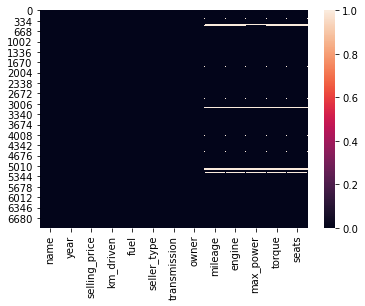

In [8]:
import seaborn as sns #подсмотрела в гугле, что удобно пропуски на большом фрейме смотреть по хитмап
sns.heatmap(df_train.isna())


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
cols = [col for col in df_train.columns] #список из наименований всех колонок (признаки+целевая переменная) датафрейма
cols.remove('selling_price') #удаляем целевую переменную
print(f'Объектов с одинаковым описанием: {len(df_train[cols])- len(df_train[cols].drop_duplicates())}')
#сверилась ради интереса с excel и количество не сошлось
#len(df_train[cols])- len(df_train[cols].drop_duplicates(keep = False))
#а вот так сошлось


Объектов с одинаковым описанием: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
duplicates = df_train[df_train.duplicated([*cols])]
duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
df_train = df_train.drop_duplicates(subset=cols)

In [12]:
assert df_train.shape == (5840, 13)

In [13]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [14]:
df_train = df_train.reset_index(drop=True) #drop = True, чтоб не сохранялся старый столбец с индексами

In [15]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [16]:
#bad_cols = ['mileage', 'engine', 'max_power']
#dfs = ['df_train', 'df_test']

df_train['mileage'] = df_train['mileage'].str.replace(r"[^\d\.]", "", regex=True) #удаляем все символы (кроме цифр и точки) 
df_train['engine'] = df_train['engine'].str.replace(r"[^\d\.]", "", regex=True)
df_train['max_power'] = df_train['max_power'].str.replace(r"[^\d\.]", "", regex=True)
df_train['mileage'] = pd.to_numeric(df_train['mileage']) # приводим к типу float64, почему-то .astype(float) не сработал
df_train['engine'] = pd.to_numeric(df_train['engine'])
df_train['max_power'] = pd.to_numeric(df_train['max_power'])

In [17]:
df_test['mileage'] = df_test['mileage'].str.replace(r"[^\d\.]", "", regex=True) #удаляем все символы кроме цифр и точки 
df_test['engine'] = df_test['engine'].str.replace(r"[^\d\.]", "", regex=True)
df_test['max_power'] = df_test['max_power'].str.replace(r"[^\d\.]", "", regex=True)
df_test['mileage'] = pd.to_numeric(df_test['mileage'])
df_test['engine'] = pd.to_numeric(df_test['engine'])
df_test['max_power'] = pd.to_numeric(df_test['max_power'])

In [18]:
df_train = df_train.drop(columns='torque') 
df_test = df_test.drop(columns='torque') 

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [19]:
bad_cols = ['mileage', 'engine', 'max_power', 'seats']
for col in bad_cols:
    df_train[col].fillna(df_train[col].median(), inplace = True) 
    print(f'Пропусков в столбце {col} = {df_train[col].isna().sum()}')

Пропусков в столбце mileage = 0
Пропусков в столбце engine = 0
Пропусков в столбце max_power = 0
Пропусков в столбце seats = 0


In [20]:
for col in bad_cols:
    df_test[col].fillna(df_train[col].median(), inplace = True) 
    print(f'Пропусков в столбце {col} = {df_train[col].isna().sum()}')

Пропусков в столбце mileage = 0
Пропусков в столбце engine = 0
Пропусков в столбце max_power = 0
Пропусков в столбце seats = 0



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [21]:
df_train['engine'] = df_train['engine'].astype('int')
df_test['engine'] = df_test['engine'].astype('int')
df_train['seats'] = df_train['seats'].astype('int')
df_test['seats'] = df_test['seats'].astype('int')

In [22]:
print("Переменная принимает ограниченное число значений. Отсутствие возможности проводить с ней операции, как с числовой характеристикой. Мб также нет явной зависимости роста стоимости ТС с увеличением числа мест.")

Переменная принимает ограниченное число значений. Отсутствие возможности проводить с ней операции, как с числовой характеристикой. Мб также нет явной зависимости роста стоимости ТС с увеличением числа мест.


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [23]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (df_train.dtypes == "object").values # категориальные признаки имеют тип "object"
cat_features_mask

array([ True, False, False, False,  True,  True,  True,  True, False,
       False, False, False])

In [24]:
df_train.columns[~cat_features_mask] # ~ это отраицание, т.е берем столбцы вещественные

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')

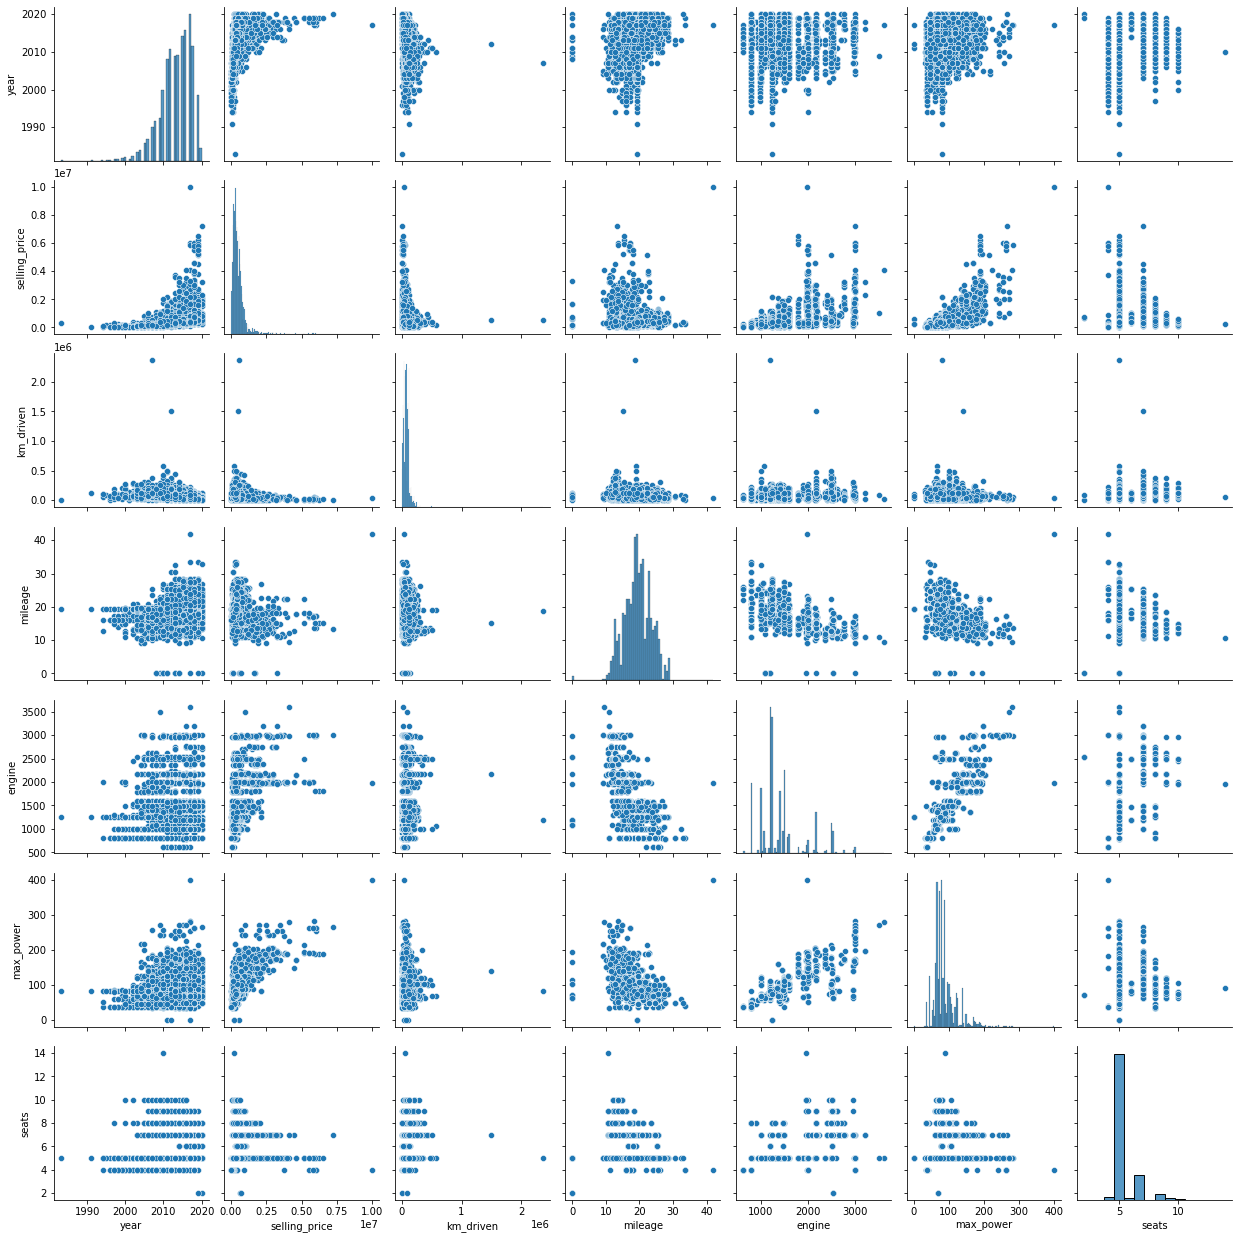

In [25]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Явно видна прямая зависимость selling_price от year и обратная зависимость selling_price от km_driven

Видно, что коррелируют признаки mileage и engine, mileage и max_power, max_power и engine

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

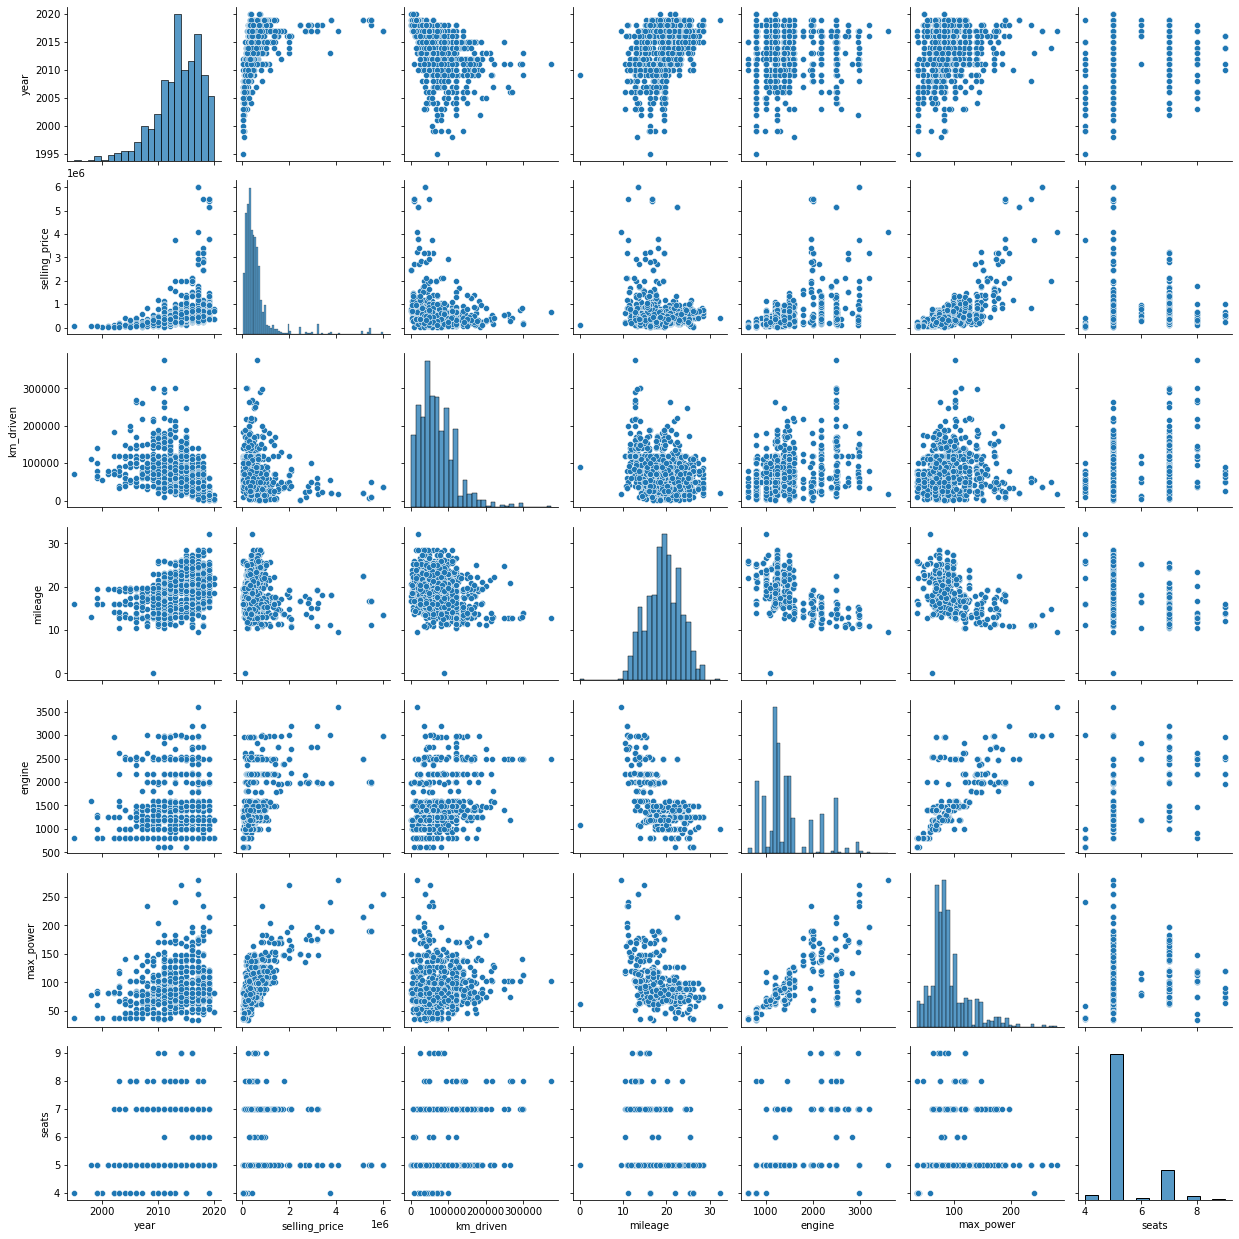

In [26]:
sns.pairplot(df_test)

Распределение признаков в тестовой выборке (смотрим по левой диагонали) похоже на распределение в трейне.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

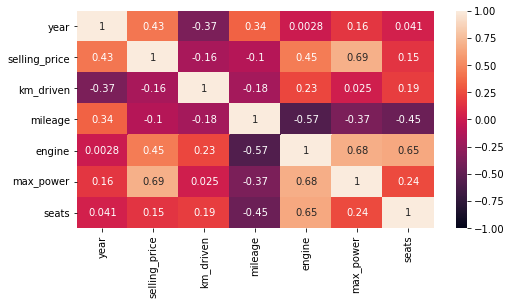

In [27]:
plt.figure(figsize=(8,4))
sns.heatmap(
    df_train.corr(),        
    annot=True, # показываем значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) Наименее скоррелированы year и engine

2) Сильная положительная линейная зависимость наблюдается между max_power и engine, а также max_power и seats (однако)

3) Коэф корреляции между year и km_driven отрицателен, но по модулу < 0.5. Поэтому тут корреляция средняя. Хотя интуитивно, чем меньше год, тем больше км проехала машина. 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='max_power', ylabel='engine'>

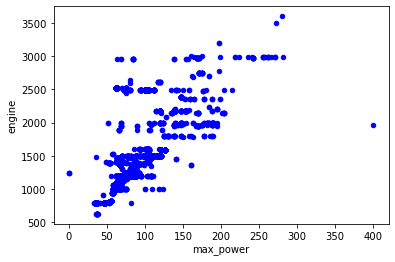

In [28]:
df_train.plot.scatter (x = 'max_power', y = 'engine', c='blue')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [29]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [30]:
y_train = df_train['selling_price']
y_train


0       450000
1       370000
2       225000
3       130000
4       440000
         ...  
5835    120000
5836    260000
5837    320000
5838    135000
5839    382000
Name: selling_price, Length: 5840, dtype: int64

In [31]:
X_train = df_train[df_train.columns[~cat_features_mask].drop('selling_price')].copy()
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [32]:
y_test = df_test['selling_price']
y_test

0      229999
1      665000
2      175000
3      635000
4      130000
        ...  
995    250000
996    440000
997    340000
998    350000
999    700000
Name: selling_price, Length: 1000, dtype: int64

In [33]:
X_test = df_test[df_test.columns[~cat_features_mask].drop('selling_price')].copy()
X_test

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.00,2498,112.00,7
1,2017,25000,21.50,1497,108.50,5
2,2007,218463,12.90,1799,130.00,5
3,2015,173000,25.10,1498,98.60,5
4,2011,70000,16.50,1172,65.00,5
...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,5
996,2017,50000,18.60,1197,81.83,5
997,2009,40000,23.00,1396,90.00,5
998,2012,25000,20.36,1197,78.90,5


In [34]:
assert X_train.shape == (5840, 6)

In [35]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [37]:
pred_mse_train = model.predict(X_train)
pred_mse_train

array([365730.80620563, 700822.5938866 , 409116.15014473, ...,
       402949.6421902 , 474514.91972302, 167272.90257497])

In [41]:
X_train @ model.coef_ + model.intercept_

0       365730.806206
1       700822.593887
2       409116.150145
3       221718.770520
4       601717.627245
            ...      
5835    -73019.529452
5836    264182.604751
5837    402949.642190
5838    474514.919723
5839    167272.902575
Length: 5840, dtype: float64

In [42]:
print(r2_score(y_train, pred_mse_train)) #плоховато
print(MSE(y_train, pred_mse_train))

0.5922591702157292
116874153930.02924


In [43]:
pred_mse_test = model.predict(X_test)

In [44]:
print(r2_score(y_test, pred_mse_test))#тоже плоховато
print(MSE(y_test, pred_mse_test))

0.5941419794788378
233298779730.45776


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
normalizer = StandardScaler()
X_norm = normalizer.fit_transform(X_train)
X = pd.DataFrame(data=X_norm)
X.describe() #должны получить среднее = 0, скд = 1, похоже на правду

,0,1,2,3,4,5
count,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03,5.840000e+03
mean,2.339654e-14,-1.306033e-17,-1.087556e-15,-1.122580e-17,2.756927e-16,-7.189645e-16
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-7.430137e+00,-1.231167e+00,-4.875222e+00,-1.658595e+00,-2.778531e+00,-3.488601e+00
25%,-5.929826e-01,-5.818974e-01,-6.224460e-01,-4.786631e-01,-6.291976e-01,-4.344190e-01
50%,1.395696e-01,-6.579834e-02,-1.526502e-02,-3.736430e-01,-1.911128e-01,-4.344190e-01
75%,8.721218e-01,4.336523e-01,7.198756e-01,1.411615e-01,3.506458e-01,-4.344190e-01
max,1.604674e+00,3.806654e+01,5.662630e+00,4.477875e+00,9.864609e+00,8.728126e+00


In [47]:
X_norm_test = normalizer.fit_transform(X_test)
X_t = pd.DataFrame(data=X_norm_test)
X_t.describe() #должны получить среднее = 0, скд = 1, похоже на правду

,0,1,2,3,4,5
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-9.982237e-15,-3.552714e-17,-5.779821e-16,3.679002e-17,2.008393e-16,5.729861e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.658439e+00,-1.446296e+00,-4.896182e+00,-1.592526e+00,-1.624090e+00,-1.537594e+00
25%,-6.685549e-01,-7.096975e-01,-7.060683e-01,-4.942666e-01,-6.262676e-01,-4.416611e-01
50%,7.954830e-02,-2.041465e-01,7.896655e-03,-3.965157e-01,-2.413317e-01,-4.416611e-01
75%,8.276515e-01,5.902909e-01,7.497113e-01,2.436564e-01,3.199435e-01,-4.416611e-01
max,1.575755e+00,6.264844e+00,3.271375e+00,4.119189e+00,5.423749e+00,3.942072e+00


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [48]:
model_n = LinearRegression()
model_n.fit(X, y_train)
#pred_mse_train = model.predict(X)
model_n.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

Т.к мы стандартизировали фичи, можно смело говорить, что признак дающий наибольший вес (по модулю) наиболее информативный

В нашем случае, это год выпуска year

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [49]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X, y_train)
pred_mse_lasso = model_lasso.predict(X)
model_lasso.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

In [50]:
 Lasso().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [92]:
print(r2_score(y_train, pred_mse_lasso))
print(MSE(y_train, pred_mse_lasso))

0.5825815275124662
119648137353.7139


In [52]:
pred_mse_lasso_test = model_lasso.predict(X_t)
#pred_mse_lasso_test

In [93]:
print(r2_score(y_test, pred_mse_lasso_test))#плак
print(MSE(y_test, pred_mse_lasso_test))

0.5334678587679917
268175996903.3061


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Нет, т.к по умолчанию параметр alpha = 1, и нам его очень мало

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [54]:
from sklearn.model_selection import GridSearchCV
parametrs = { 'alpha': range(26600, 27000, 1)}
grid_lasso = GridSearchCV(Lasso(), parametrs, cv = 10) # количество разбиений на кросс-валидацию ( < 3 делать не стоит) 

In [55]:
grid_lasso.fit(X, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': range(26600, 27000)})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

cv*len(range(26600, 27000, 1))

в моем случае 4000

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [56]:
grid_lasso.best_params_ #лучший коэф

{'alpha': 26609}

In [96]:
model_lasso = Lasso(alpha = 26609)

model_lasso.fit(X, y_train)
pred_mse_lasso_norm = model_lasso.predict(X)
model_lasso.coef_

array([145859.67326325, -15733.61547572,      0.        ,      0.        ,
       321821.56166739,     -0.        ])

Похоже, что занулились веса коррелирующих признаки 'mileage', 'engine', а так же 'seats'

In [97]:
print(r2_score(y_train, pred_mse_lasso_norm))
print(MSE(y_train, pred_mse_lasso_norm))#по-прежнему грустненько

0.5825815275124662
119648137353.7139


In [98]:
pred_mse_lasso_test_norm = model_lasso.predict(X_t)

In [99]:
print(r2_score(y_test, pred_mse_lasso_test_norm))
print(MSE(y_test, pred_mse_lasso_test_norm))# почему-то даже хуже, чем без регуляризации

0.5334678587679917
268175996903.3061


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [61]:
from sklearn.linear_model import ElasticNet

parametrs = { 'alpha': np.arange(1, 2, 0.1), 'l1_ratio': np.arange(0.5, 1, 0.05)}
grid_el = GridSearchCV(ElasticNet(), parametrs, cv = 10)

In [62]:
grid_el.fit(X, y_train)


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'l1_ratio': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])})

In [63]:
grid_el.best_params_

{'alpha': 1.5000000000000004, 'l1_ratio': 0.9000000000000004}

In [64]:
model_elastic = ElasticNet(alpha = 1.5, l1_ratio = 0.9)

model_elastic.fit(X, y_train)
pred_mse_elastic = model_elastic.predict(X)
model_elastic.coef_

array([142285.97988682, -46199.0715452 ,  20366.57384119,  82462.95881121,
       266766.4121874 , -22959.76356008])

In [100]:
print(r2_score(y_train, pred_mse_elastic))
print(MSE(y_train, pred_mse_elastic))

0.5845293204372265
119089825226.29533


In [102]:
pred_mse_elastic_test = model_elastic.predict(X_t)

In [104]:
print(r2_score(y_test, pred_mse_elastic_test))
print(MSE(y_test, pred_mse_elastic_test))

0.5328003454871566
268559702598.398


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [68]:
grid_el.best_params_ #лучшие параметры

{'alpha': 1.5000000000000004, 'l1_ratio': 0.9000000000000004}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [69]:
X_train_cat = df_train.drop(columns = ['selling_price', 'name'])
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [70]:
assert X_train_cat.shape == (5840, 10)

In [71]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [72]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [73]:
X_train_cat['seats'] = X_train_cat['seats'].astype('str')

In [74]:
X_dum = pd.get_dummies(X_train_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']], drop_first=True)
print(X_dum.shape)
X_dum.head()

(5840, 18)


,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [76]:
X_all = pd.concat([X.drop(columns = 5), X_dum], axis=1) # склеиваем по столбцам
X_all

,0,1,2,3,4,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.139570,0.766619,0.428830,0.141162,0.493513,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
5838,-1.569719,0.749971,-0.660081,0.130865,0.698332,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Проделаем все-таки то же и для test

In [116]:
X_test_cat = df_test.drop(columns = ['selling_price', 'name'])
X_test_cat.describe(include='object')
X_test_cat['seats'] = X_test_cat['seats'].astype('str')
X_dum_test = pd.get_dummies(X_test_cat[['fuel', 'seller_type', 'transmission', 'owner', 'seats']], drop_first=True)
X_dum_test.head()
X_all_test = pd.concat([X_t.drop(columns = 5), X_dum_test], axis=1) # склеиваем по столбцам


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parametrs_ridge = { 'alpha': np.arange(100, 110, 0.1)}
grid_ridge = GridSearchCV(Ridge(),  parametrs_ridge, cv = 10, scoring = make_scorer(r2_score))

In [78]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [79]:
grid_ridge.fit(X_all, y_train)


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([100. , 100.1, 100.2, 100.3, 100.4, 100.5, 100.6, 100.7, 100.8,
       100.9, 101. , 101.1, 101.2, 101.3, 101.4, 101.5, 101.6, 101.7,
       101.8, 101.9, 102. , 102.1, 102.2, 102.3, 102.4, 102.5, 102.6,
       102.7, 102.8, 102.9, 103. , 103.1, 103.2, 103.3, 103.4, 103.5,
       103.6, 103.7, 103.8, 103.9, 104. , 104.1, 104.2, 104.3, 104.4,
       104.5, 104.6, 104.7, 104.8, 104.9, 105. , 105.1, 105.2, 105.3,
       105.4, 105.5, 105.6, 105.7, 105.8, 105.9, 106. , 106.1, 106.2,
       106.3, 106.4, 106.5, 106.6, 106.7, 106.8, 106.9, 107. , 107.1,
       107.2, 107.3, 107.4, 107.5, 107.6, 107.7, 107.8, 107.9, 108. ,
       108.1, 108.2, 108.3, 108.4, 108.5, 108.6, 108.7, 108.8, 108.9,
       109. , 109.1, 109.2, 109.3, 109.4, 109.5, 109.6, 109.7, 109.8,
       109.9])},
             scoring=make_scorer(r2_score))

In [80]:
grid_ridge.best_params_

{'alpha': 100.0}

In [81]:
model_ridge = Ridge(alpha = 100)

model_ridge.fit(X_all, y_train)
pred_mse_ridge = model_ridge.predict(X_all)
model_ridge.coef_

array([ 140042.80504654,  -34829.82393064,   31602.09217969,
         33410.92263604,  289646.56590351,   12378.7612329 ,
         33393.5145765 ,  -36331.08824042, -107167.29391753,
        -24884.98140968, -253242.18322233,  -25051.60798967,
        -51108.62723479,  127554.68823047,  -33560.17147396,
         -2448.1199265 ,    2303.69347235,  232864.13285818,
        -82618.20618276,  -54266.72391428,  -59870.34907487,
        -20931.63762009,  -12929.06036685])

In [105]:
print(r2_score(y_train, pred_mse_ridge))
print(MSE(y_train, pred_mse_ridge))

0.6378310220115562
103811514055.38155


Качество предсказания слегка улучшилось.

In [126]:
#Чисто ради интереса, попробует Ridge регрессию только на вещественных признаках
grid_ridge.fit(X, y_train)
grid_ridge.best_params_
model_ridge_num = Ridge(alpha = 109.89)

model_ridge_num.fit(X, y_train)
pred_mse_ridge_num = model_ridge_num.predict(X)
#model_ridge.coef_
print(f'r2_score train = {r2_score(y_train, pred_mse_ridge_num)}')
print(f' MSE train = {MSE(y_train, pred_mse_ridge_num)}')

pred_mse_ridge_num_test = model_ridge_num.predict(X_t)
print(f'r2_score test = {r2_score(y_test, pred_mse_ridge_num_test)}')
print(f' MSE test = {MSE(y_test, pred_mse_ridge_num_test)}')

r2_score train = 0.5920757720516054
 MSE train = 116926722875.05159
r2_score test = 0.5612049954281108
 MSE test = 252231898699.42368


# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [83]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [106]:
y_true = df_train['selling_price']
y_pred = X_all @ model_ridge.coef_ + model_ridge.intercept_

In [110]:
def business_metrics(y_true, y_pred):
    k = 0
    for i in range(len(y_true)):
        if 0.9 <= y_pred[i] / y_true[i] <= 1.1:
            k+=1
    return k / len(y_true)
    

business_metrics(df_train['selling_price'], X_all @ model_ridge.coef_ + model_ridge.intercept_) #очень-очень печально

0.20993150684931508

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link